In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing

In [2]:
data = pd.read_csv('MagicTelescope.csv')

In [3]:
data.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [22]:
# en = preprocessing.LabelEncoder()
# en.fit(['h','g'])
data.loc[:,'class']

0        0
1        0
2        0
3        0
4        0
        ..
19015    1
19016    1
19017    1
19018    1
19019    1
Name: class, Length: 19020, dtype: int32

In [25]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [146]:
#cleanup_nums = {"class:":     {"g": 1, "h": 0}}
#data.replace(cleanup_nums, inplace=True)

In [147]:
#from warnings import simplefilter
#simplefilter(action='ignore', category=FutureWarning)
#simplefilter(action='ignore', category=Warning)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [27]:
tdata = data
scaler = preprocessing.RobustScaler()
tdata[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']] = scaler.fit_transform(data[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']])

In [28]:
dlist = list(tdata)
train = dlist[1:10]
predict = dlist[-1]
X = tdata[train]
Y = tdata[[predict]]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(x_train,y_train)
DT_predicted = DT.predict(x_test)
DTC = DT.score(x_test,y_test)

In [31]:
print('Classification Report of Decision Tree Induction:\n')
print("\nAccuracy of DT: ",DTC*100,"%\n")
print(classification_report(y_test, DT_predicted))

Classification Report of Decision Tree Induction:


Accuracy of DT:  84.40238345601122 %

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3665
           1       0.84      0.69      0.76      2041

    accuracy                           0.84      5706
   macro avg       0.84      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706



In [32]:
dt_cf = confusion_matrix(y_test,DT_predicted)

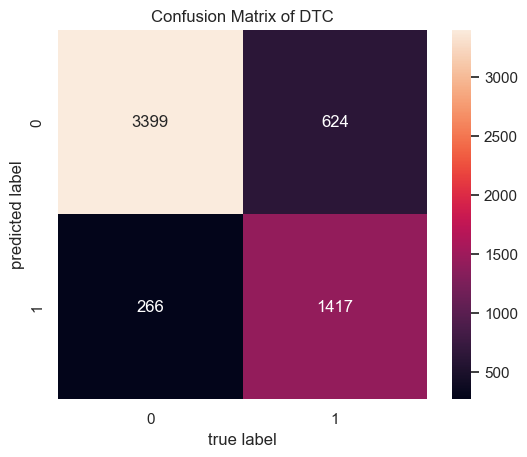

In [33]:
sns.heatmap(dt_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

In [34]:
dt_fpr, dt_tpr, dt_threshold = metrics.roc_curve(y_test, DT_predicted)
dt_roc = metrics.auc(dt_fpr, dt_tpr)

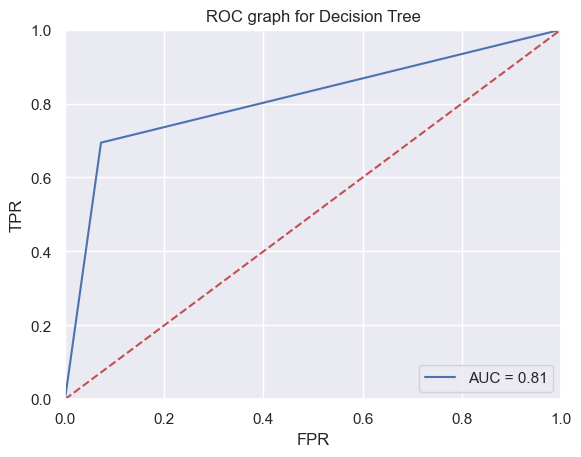

In [35]:
plt.title('ROC graph for Decision Tree')
plt.plot(dt_fpr, dt_tpr, label='AUC = %0.2f' %dt_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True,bootstrap = True, max_features = 'sqrt')
RF.fit(x_train,y_train.values.ravel())
RF_predicted = RF.predict(x_test)
RFS = RF.score(x_test,y_test.values.ravel())

In [37]:
print('Classification Report of RFC:\n')
print("\nAccuracy of RFC: ",RFS*100,"%\n")
print(classification_report(y_test, RF_predicted))

Classification Report of RFC:


Accuracy of RFC:  86.92604276200491 %

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3665
           1       0.86      0.75      0.80      2041

    accuracy                           0.87      5706
   macro avg       0.87      0.84      0.85      5706
weighted avg       0.87      0.87      0.87      5706



In [38]:
rf_cf = confusion_matrix(y_test, RF_predicted)

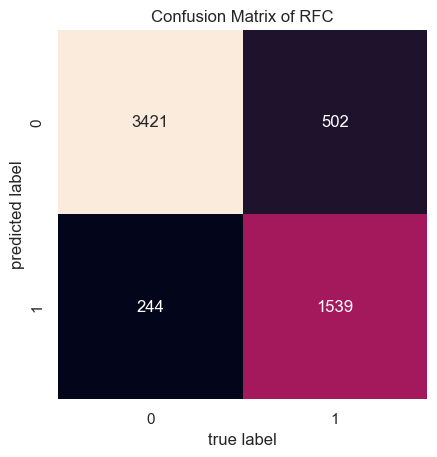

In [39]:
sns.heatmap(rf_cf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.xticks(tick_marks, classNames, rotation=45)
#plt.yticks(tick_marks, classNames)
plt.title('Confusion Matrix of RFC');

In [40]:
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, RF_predicted)
rf_roc = metrics.auc(rf_fpr, rf_tpr)

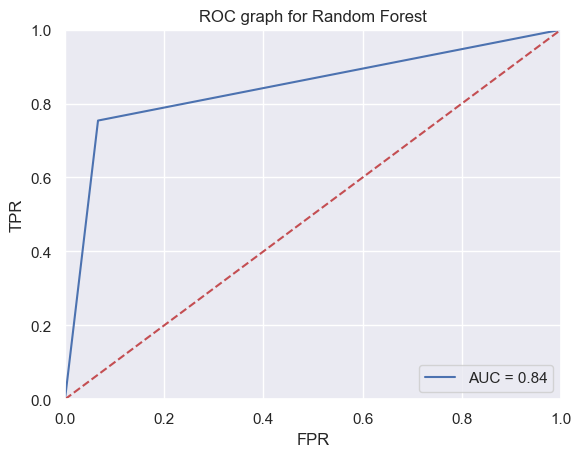

In [41]:
plt.title('ROC graph for Random Forest')
plt.plot(rf_fpr, rf_tpr, label='AUC = %0.2f' %rf_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [42]:
data_scaled = data

In [43]:
scaler = preprocessing.StandardScaler()
data_scaled[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']] = scaler.fit_transform(data_scaled[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']])

In [44]:
dslist = list(data_scaled)
strain = dslist[1:10]
spredict = dslist[-1]
Xs = data_scaled[strain]
Ys = data_scaled[[spredict]]
xs_train, xs_test, ys_train, ys_test = train_test_split(Xs,Ys,test_size=0.3)

In [45]:
from sklearn.svm import LinearSVC
SV = LinearSVC(max_iter = 10000)
SV.fit(x_train,y_train.values.ravel())
SV_predicted = SV.predict(x_test)
SVS = SV.score(x_test,y_test.values.ravel())

In [46]:
print('Classification Report of SVM:\n')
print("\nAccuracy of SVC: ",SVS*100,"%\n")
print(classification_report(y_test, SV_predicted))

Classification Report of SVM:


Accuracy of SVC:  77.4272695408342 %

              precision    recall  f1-score   support

           0       0.78      0.89      0.84      3665
           1       0.75      0.56      0.64      2041

    accuracy                           0.77      5706
   macro avg       0.77      0.73      0.74      5706
weighted avg       0.77      0.77      0.77      5706



In [47]:
sv_cf = confusion_matrix(y_test,SV_predicted)

In [48]:
print(sv_cf)

[[3277  388]
 [ 900 1141]]


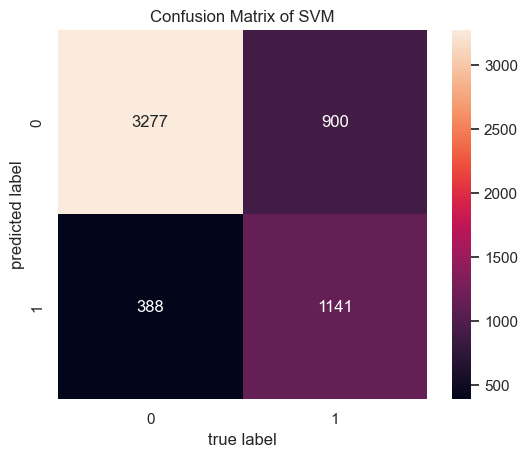

In [49]:
sns.heatmap(sv_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of SVM');

In [50]:
sv_fpr, sv_tpr, sv_threshold = metrics.roc_curve(y_test, SV_predicted)
sv_roc = metrics.auc(sv_fpr, sv_tpr)

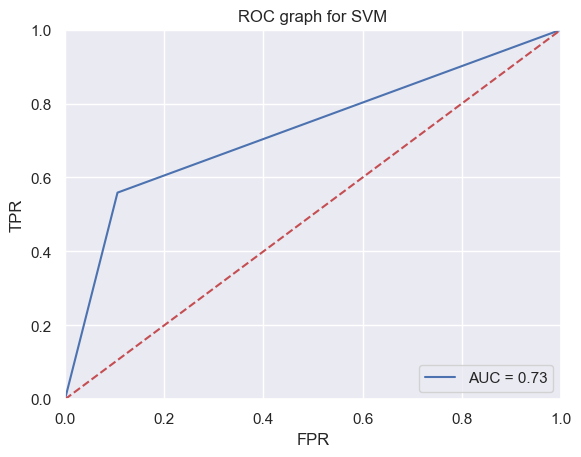

In [51]:
plt.title('ROC graph for SVM')
plt.plot(sv_fpr, sv_tpr, label='AUC = %0.2f' %sv_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [52]:
data_norm = data

In [53]:
normalizer = preprocessing.Normalizer()
data_norm[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']] = normalizer.fit_transform(data_norm[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']])

In [54]:
dnlist = list(data_norm)
ntrain = dnlist[1:10]
npredict = dlist[-1]
Xn = data_norm[ntrain]
Yn = data_norm[[npredict]]
xn_train, xn_test, yn_train, yn_test = train_test_split(Xn,Yn,test_size=0.3)

In [55]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train.values.ravel())
NB_predicted = NB.predict(x_test)
NBS = NB.score(x_test,y_test.values.ravel())

In [57]:
print('Classification Report of Naive Bayes:\n')
print("\nAccuracy of Naive Bayes: ",NBS*100,"%\n")
print(classification_report(y_test, NB_predicted))

Classification Report of Naive Bayes:


Accuracy of Naive Bayes:  73.58920434630214 %

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      3665
           1       0.75      0.39      0.52      2041

    accuracy                           0.74      5706
   macro avg       0.74      0.66      0.67      5706
weighted avg       0.74      0.74      0.71      5706



In [58]:
nb_cf = confusion_matrix(y_test,NB_predicted)

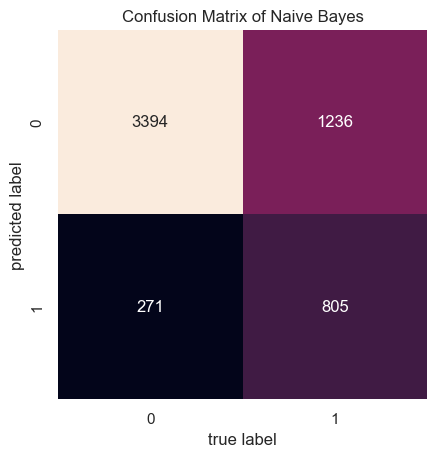

In [59]:
sns.heatmap(nb_cf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of Naive Bayes');

In [60]:
nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, NB_predicted)
nb_roc = metrics.auc(nb_fpr, nb_tpr)

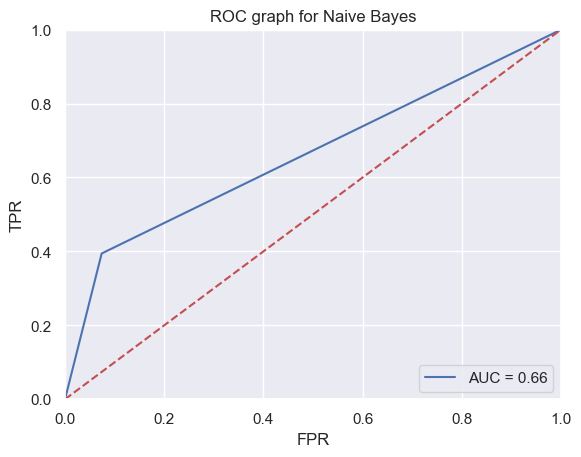

In [61]:
plt.title('ROC graph for Naive Bayes')
plt.plot(nb_fpr, nb_tpr, label='AUC = %0.2f' %nb_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [62]:
rf_TP = rf_cf[0][0]
rf_FP = rf_cf[0][1]
rf_FN = rf_cf[1][0]
rf_TN = rf_cf[1][1]

In [63]:
rf_FP = rf_FP.astype(float)
rf_TP = rf_TP.astype(float)
rf_FN = rf_FN.astype(float)
rf_TN = rf_TN.astype(float)

In [64]:
#Sensitivity, recall, TPR
rf_TPR = rf_TP / (rf_TP + rf_FN)
#FPR
rf_FPR = rf_FP / (rf_FP + rf_TN)
#Specifity, TNR
rf_TNR = rf_TN / (rf_TN + rf_FP)
#Precision
rf_PRE = rf_TP / (rf_TP + rf_FP)
#Accuracy
rf_ACC = (rf_TP + rf_TN) / (rf_TP + rf_FP + rf_FN + rf_TN)

In [65]:
print("TPR of Random Forest: " ,rf_TPR)
print("FPR of Random Forest: " ,rf_FPR)

TPR of Random Forest:  0.8720367066020902
FPR of Random Forest:  0.13684800897363994


In [66]:
sv_TP = sv_cf[0][0]
sv_FP = sv_cf[0][1]
sv_FN = sv_cf[1][0]
sv_TN = sv_cf[1][1]
sv_FP = sv_FP.astype(float)
sv_TP = sv_TP.astype(float)
sv_FN = sv_FN.astype(float)
sv_TN = sv_TN.astype(float)

In [67]:
#Sensitivity, recall, TPR
sv_TPR = sv_TP / (sv_TP + sv_FN)
#FPR
sv_FPR = sv_FP / (sv_FP + sv_TN)

In [68]:
print("TPR of SVM: " ,sv_TPR)
print("FPR of SVM: " ,sv_FPR)

TPR of SVM:  0.7845343548000958
FPR of SVM:  0.2537606278613473


In [69]:
DT_TP = dt_cf[0][0]
DT_FP = dt_cf[0][1]
DT_FN = dt_cf[1][0]
DT_TN = dt_cf[1][1]
DT_FP = DT_FP.astype(float)
DT_TP = DT_TP.astype(float)
DT_FN = DT_FN.astype(float)
DT_TN = DT_TN.astype(float)

In [70]:
#Sensitivity, recall, TPR
DT_TPR = DT_TP / (DT_TP + DT_FN)
#FPR
DT_FPR = DT_FP / (DT_FP + DT_TN)

In [71]:
print("TPR of Decision Tree: " ,DT_TPR)
print("FPR of Decision Tree: " ,DT_FPR)

TPR of Decision Tree:  0.8448918717375093
FPR of Decision Tree:  0.15805109922756982


In [72]:
BN_TP = nb_cf[0][0]
BN_FP = nb_cf[0][1]
BN_FN = nb_cf[1][0]
BN_TN = nb_cf[1][1]
BN_FP = BN_FP.astype(float)
BN_TP = BN_TP.astype(float)
BN_FN = BN_FN.astype(float)
BN_TN = BN_TN.astype(float)
#Sensitivity, recall, TPR
BN_TPR = BN_TP / (BN_TP + BN_FN)
#FPR
BN_FPR = BN_FP / (BN_FP + BN_TN)
print("TPR of Naive Bayes: " ,BN_TPR)
print("FPR of Naive Bayes: " ,BN_FPR)

TPR of Naive Bayes:  0.7330453563714903
FPR of Naive Bayes:  0.25185873605947956
